In [1]:
import numpy as np
import pymysql
import pandas as pd
import seaborn as sns

from tqdm import tqdm

In [2]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
def unit_stats(x, title):
    df = {}

    df['edu'] = x.iloc[0]['education']
    df['age'] = x.iloc[0]['age']
    df['duration'] = x.iloc[0]['duration_date']
    df['organization'] = x.iloc[0]['organization']
    df[title + '_num'] = x['user_idx'].count()
    df[title + '_level'] = x['game_log_level'].mean()
    df[title + '_time'] = x['game_log_time'].mean()
    df[title + '_score'] = x['game_log_success'].mean()
    
    return pd.Series(df)

In [4]:
def user_log_arange(x, title):
    game_log = pd.read_csv("../game_log.csv", encoding='utf-8-sig', index_col='game_log_idx')
    unit_df = [game_log[game_log['unit']==n ] for n in x]
    unit = pd.concat(unit_df)
    
    unit_log = unit.groupby(['user_idx']).apply(unit_stats, (title))
    return unit_log

In [5]:
x = [2,4,7,8,9,10,11,12,13]
user_log_lobe = user_log_arange(x, 'Lobe')

In [6]:
user_log_lobe

,edu,age,duration,organization,Lobe_num,Lobe_level,Lobe_time,Lobe_score
user_idx,,,,,,,,
39,16,71.0,332,로아신경과의원,90,5.777778,72.090904,86.687333
42,16,72.0,325,로아신경과의원,82,5.646341,72.391325,90.720122
51,16,81.0,317,로아신경과의원,533,5.245779,42.750399,82.530957
91,16,68.0,302,로아신경과의원,35,1.828571,41.955749,71.751429
93,7,76.0,301,로아신경과의원,163,5.098160,52.948000,69.520613
...,...,...,...,...,...,...,...,...
1028,12,83.0,55,MEET-보바스,35,1.771429,21.073587,81.607143
1029,6,78.0,55,MEET-보바스,28,1.785714,18.158255,70.602500
1041,12,84.0,49,로아신경과의원,76,5.460526,35.600350,69.863158


In [7]:
x = [3, 5, 6]
user_log_memory = user_log_arange(x, 'Memory')
user_log_memory

,edu,age,duration,organization,Memory_num,Memory_level,Memory_time,Memory_score
user_idx,,,,,,,,
39,16,71.0,332,로아신경과의원,51,4.529412,14.557261,65.598627
42,16,72.0,325,로아신경과의원,61,5.098361,10.913438,67.869672
51,16,81.0,317,로아신경과의원,239,4.514644,13.303353,81.091046
91,16,68.0,302,로아신경과의원,16,1.625000,8.666068,78.812500
93,7,76.0,301,로아신경과의원,58,4.241379,16.294327,75.397931
...,...,...,...,...,...,...,...,...
1023,16,86.0,55,로아신경과의원,4,2.000000,1.784369,52.472500
1028,12,83.0,55,MEET-보바스,28,1.785714,5.710341,89.811429
1029,6,78.0,55,MEET-보바스,21,1.285714,6.694419,92.683333


In [8]:
x = [17, 18, 19, 20]
user_log_calculation = user_log_arange(x, 'Calculation')
user_log_calculation

,edu,age,duration,organization,Calculation_num,Calculation_level,Calculation_time,Calculation_score
user_idx,,,,,,,,
39,16,71.0,332,로아신경과의원,43,6.069767,47.556115,86.993256
42,16,72.0,325,로아신경과의원,24,5.791667,16.304875,88.265417
51,16,81.0,317,로아신경과의원,292,5.027397,24.577729,76.609281
91,16,68.0,302,로아신경과의원,13,2.461538,41.522030,75.143077
93,7,76.0,301,로아신경과의원,58,4.775862,39.418168,78.178621
...,...,...,...,...,...,...,...,...
1023,16,86.0,55,로아신경과의원,3,2.000000,12.534244,81.956667
1028,12,83.0,55,MEET-보바스,16,1.437500,9.414106,87.201250
1029,6,78.0,55,MEET-보바스,11,1.000000,13.652202,79.791818


In [9]:
x = [14, 16, 15, 22]
user_log_space_recog = user_log_arange(x, 'Space_Recognize')
user_log_space_recog

,edu,age,duration,organization,Space_Recognize_num,Space_Recognize_level,Space_Recognize_time,Space_Recognize_score
user_idx,,,,,,,,
39,16,71.0,332,로아신경과의원,24,5.500000,23.429833,89.219583
42,16,72.0,325,로아신경과의원,13,5.923077,16.263243,86.805385
50,16,26.0,317,로아신경과의원,1,1.000000,23.542857,57.140000
51,16,81.0,317,로아신경과의원,97,5.618557,17.463709,86.171649
91,16,68.0,302,로아신경과의원,11,1.454545,53.867025,58.766364
...,...,...,...,...,...,...,...,...
1023,16,86.0,55,로아신경과의원,3,2.000000,51.433333,59.850000
1028,12,83.0,55,MEET-보바스,43,1.116279,12.926121,45.613023
1029,6,78.0,55,MEET-보바스,24,1.291667,45.695071,85.152500


In [10]:
merge1 = pd.merge(user_log_lobe, user_log_memory, on=['user_idx', 'edu', 'age', 'duration', 'organization'])
merge2 = pd.merge(user_log_calculation, user_log_space_recog, on=['user_idx', 'edu', 'age', 'duration', 'organization'])
user_log_merge = pd.merge(merge1, merge2, on=['user_idx', 'edu', 'age', 'duration', 'organization'])

In [11]:
len(user_log_merge)

460

In [12]:
speed_over100_idx = user_log_merge[user_log_merge['Lobe_time'] > 100].index
print(speed_over100_idx)
speed_over100_idx = speed_over100_idx.append(user_log_merge[user_log_merge['Memory_time'] > 100].index)
print(speed_over100_idx)
speed_over100_idx = speed_over100_idx.append(user_log_merge[user_log_merge['Calculation_time'] > 100].index)
print(speed_over100_idx)
speed_over100_idx = speed_over100_idx.append(user_log_merge[user_log_merge['Space_Recognize_time'] > 100].index)
print(speed_over100_idx)
user_log_merge = user_log_merge.drop(speed_over100_idx)
user_log_over65 = user_log_merge[user_log_merge['age']>65]

Int64Index([], dtype='int64', name='user_idx')
Int64Index([], dtype='int64', name='user_idx')
Int64Index([457], dtype='int64', name='user_idx')
Int64Index([457, 420, 460, 548, 684, 685, 687, 689, 870], dtype='int64', name='user_idx')


In [13]:
user_log_over65

,edu,age,duration,organization,Lobe_num,Lobe_level,Lobe_time,Lobe_score,Memory_num,Memory_level,Memory_time,Memory_score,Calculation_num,Calculation_level,Calculation_time,Calculation_score,Space_Recognize_num,Space_Recognize_level,Space_Recognize_time,Space_Recognize_score
user_idx,,,,,,,,,,,,,,,,,,,,
39,16,71.0,332,로아신경과의원,90,5.777778,72.090904,86.687333,51,4.529412,14.557261,65.598627,43,6.069767,47.556115,86.993256,24,5.500000,23.429833,89.219583
42,16,72.0,325,로아신경과의원,82,5.646341,72.391325,90.720122,61,5.098361,10.913438,67.869672,24,5.791667,16.304875,88.265417,13,5.923077,16.263243,86.805385
51,16,81.0,317,로아신경과의원,533,5.245779,42.750399,82.530957,239,4.514644,13.303353,81.091046,292,5.027397,24.577729,76.609281,97,5.618557,17.463709,86.171649
91,16,68.0,302,로아신경과의원,35,1.828571,41.955749,71.751429,16,1.625000,8.666068,78.812500,13,2.461538,41.522030,75.143077,11,1.454545,53.867025,58.766364
93,7,76.0,301,로아신경과의원,163,5.098160,52.948000,69.520613,58,4.241379,16.294327,75.397931,58,4.775862,39.418168,78.178621,67,4.149254,33.548905,72.209104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,16,86.0,55,로아신경과의원,15,2.066667,29.626877,69.962000,4,2.000000,1.784369,52.472500,3,2.000000,12.534244,81.956667,3,2.000000,51.433333,59.850000
1028,12,83.0,55,MEET-보바스,35,1.771429,21.073587,81.607143,28,1.785714,5.710341,89.811429,16,1.437500,9.414106,87.201250,43,1.116279,12.926121,45.613023
1029,6,78.0,55,MEET-보바스,28,1.785714,18.158255,70.602500,21,1.285714,6.694419,92.683333,11,1.000000,13.652202,79.791818,24,1.291667,45.695071,85.152500


In [14]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_log_over65.drop('organization', axis=1))

In [16]:
kmeans = KMeans(init="random", n_clusters=6, n_init=10, max_iter=300, random_state=42)

In [17]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=6, random_state=42)

In [18]:
label = kmeans.labels_

In [19]:
user_log_over65['label'] = label

C:\Users\sanghyun\AppData\Local\Temp\ipykernel_7232\1191600724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_log_over65['label'] = label


In [20]:
user_log_over65.drop('label',1)

C:\Users\sanghyun\AppData\Local\Temp\ipykernel_7232\1366971572.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  user_log_over65.drop('label',1)


,edu,age,duration,organization,Lobe_num,Lobe_level,Lobe_time,Lobe_score,Memory_num,Memory_level,Memory_time,Memory_score,Calculation_num,Calculation_level,Calculation_time,Calculation_score,Space_Recognize_num,Space_Recognize_level,Space_Recognize_time,Space_Recognize_score
user_idx,,,,,,,,,,,,,,,,,,,,
39,16,71.0,332,로아신경과의원,90,5.777778,72.090904,86.687333,51,4.529412,14.557261,65.598627,43,6.069767,47.556115,86.993256,24,5.500000,23.429833,89.219583
42,16,72.0,325,로아신경과의원,82,5.646341,72.391325,90.720122,61,5.098361,10.913438,67.869672,24,5.791667,16.304875,88.265417,13,5.923077,16.263243,86.805385
51,16,81.0,317,로아신경과의원,533,5.245779,42.750399,82.530957,239,4.514644,13.303353,81.091046,292,5.027397,24.577729,76.609281,97,5.618557,17.463709,86.171649
91,16,68.0,302,로아신경과의원,35,1.828571,41.955749,71.751429,16,1.625000,8.666068,78.812500,13,2.461538,41.522030,75.143077,11,1.454545,53.867025,58.766364
93,7,76.0,301,로아신경과의원,163,5.098160,52.948000,69.520613,58,4.241379,16.294327,75.397931,58,4.775862,39.418168,78.178621,67,4.149254,33.548905,72.209104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,16,86.0,55,로아신경과의원,15,2.066667,29.626877,69.962000,4,2.000000,1.784369,52.472500,3,2.000000,12.534244,81.956667,3,2.000000,51.433333,59.850000
1028,12,83.0,55,MEET-보바스,35,1.771429,21.073587,81.607143,28,1.785714,5.710341,89.811429,16,1.437500,9.414106,87.201250,43,1.116279,12.926121,45.613023
1029,6,78.0,55,MEET-보바스,28,1.785714,18.158255,70.602500,21,1.285714,6.694419,92.683333,11,1.000000,13.652202,79.791818,24,1.291667,45.695071,85.152500


In [24]:
user_log_over65['label'].to_csv('label.csv')

C:\Users\sanghyun\AppData\Local\Temp\ipykernel_7232\3409125328.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_clustered = pd.DataFrame(scaled_features, index=user_log_over65.drop(['organization','label'],1).index, columns=user_log_over65.drop(['organization','label'],1).columns)
C:\Users\sanghyun\AppData\Local\Temp\ipykernel_7232\3409125328.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_clustered = pd.DataFrame(scaled_features, index=user_log_over65.drop(['organization','label'],1).index, columns=user_log_over65.drop(['organization','label'],1).columns)


<function matplotlib.pyplot.show(close=None, block=None)>

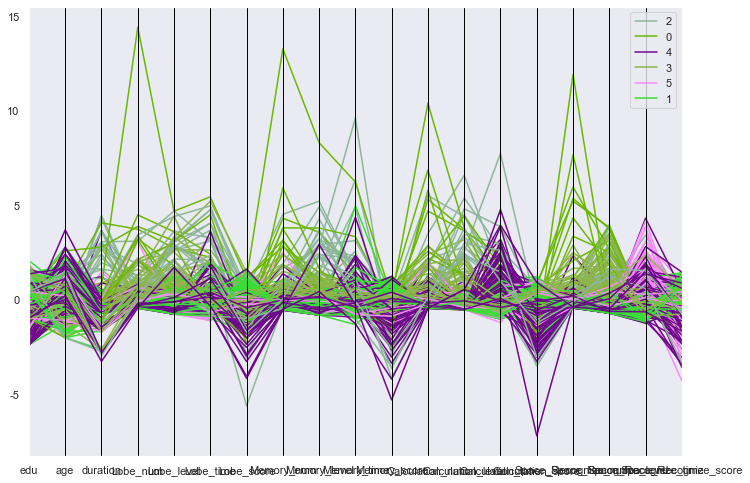

In [22]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(scaled_features, index=user_log_over65.drop(['organization','label'],1).index, columns=user_log_over65.drop(['organization','label'],1).columns)
X_clustered["cluster"] = label

# Display parallel coordinates plots, one for each cluster
pd.plotting.parallel_coordinates(X_clustered, 'cluster')
# plt.rcParams["figure.figsize"] = (15,10)
plt.show

# 1번 그룹은 난이도가 높은 단계까지 수행한 집단이다.

In [23]:
palette = dict(zip(np.unique(label), sns.color_palette(n_colors=6)))

In [24]:
pd.DataFrame(label).value_counts()

5    154
2    135
4     54
1     48
0     16
3      7
dtype: int64

In [25]:
np.quantile(user_log_over65['age'], [0, 0.333, 0.666, 1])

array([66., 75., 79., 97.])

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


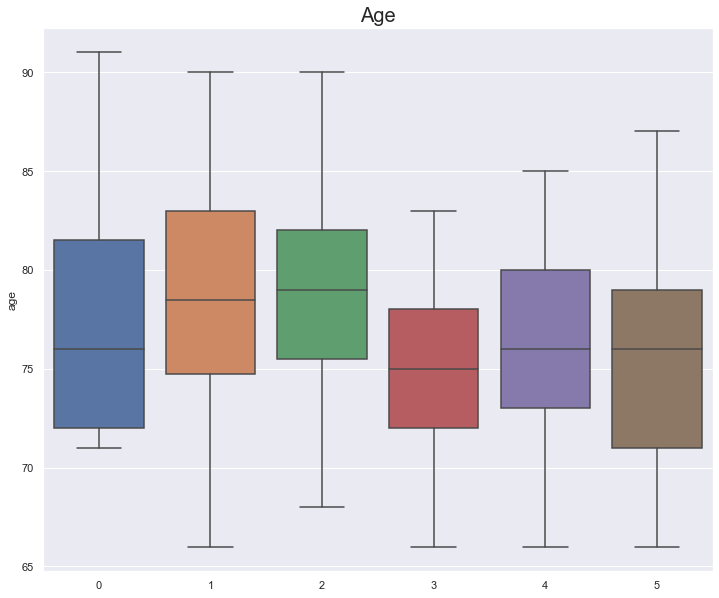

In [26]:
plt.figure(figsize=(12,10))
plt.title('Age', fontsize=20)
sns.boxplot(label, user_log_over65['age'], showfliers=False, palette=palette)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


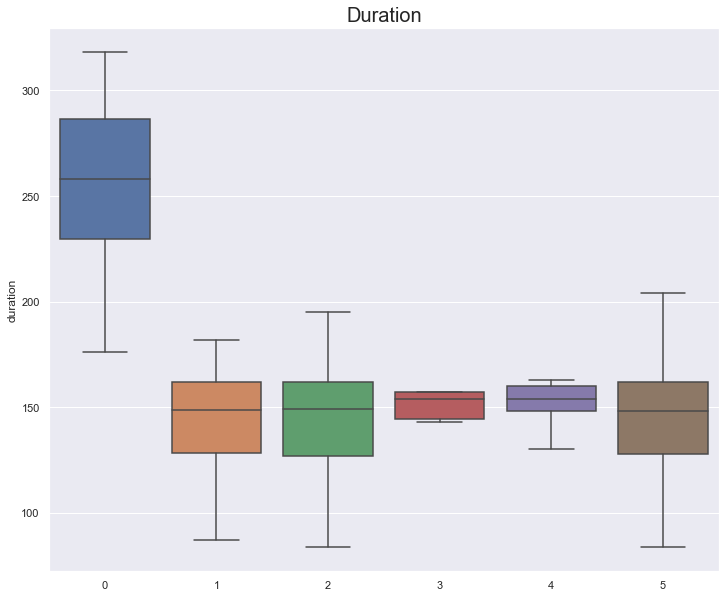

In [27]:
plt.figure(figsize=(12,10))
plt.title('Duration', fontsize=20)
sns.boxplot(label, user_log_over65['duration'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


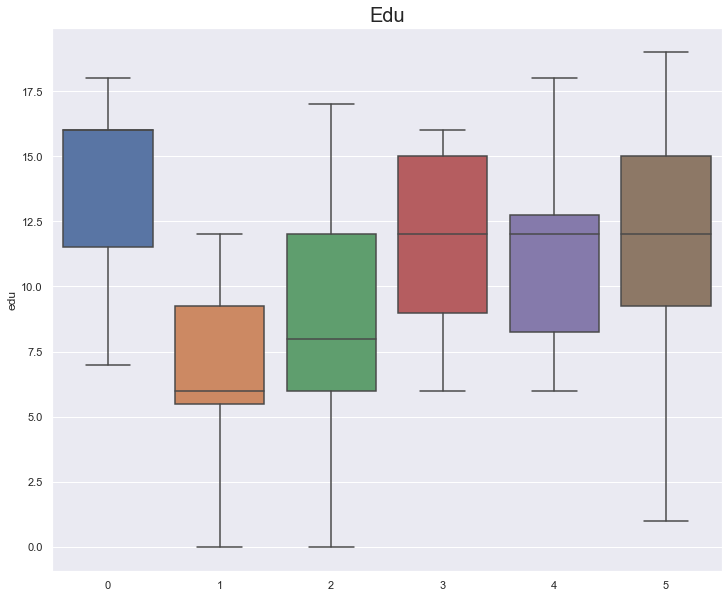

In [28]:
plt.figure(figsize=(12,10))
plt.title('Edu', fontsize=20)
sns.boxplot(label, user_log_over65['edu'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


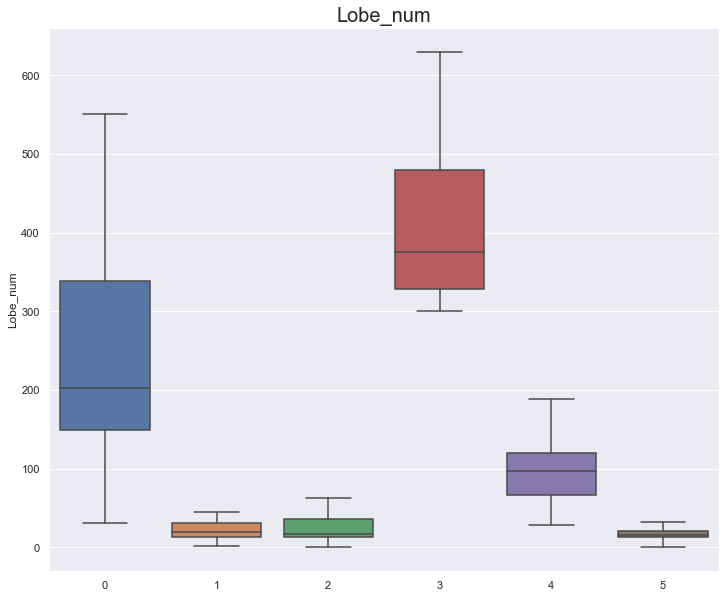

In [29]:
plt.figure(figsize=(12,10))
plt.title('Lobe_num', fontsize=20)
sns.boxplot(label, user_log_over65['Lobe_num'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


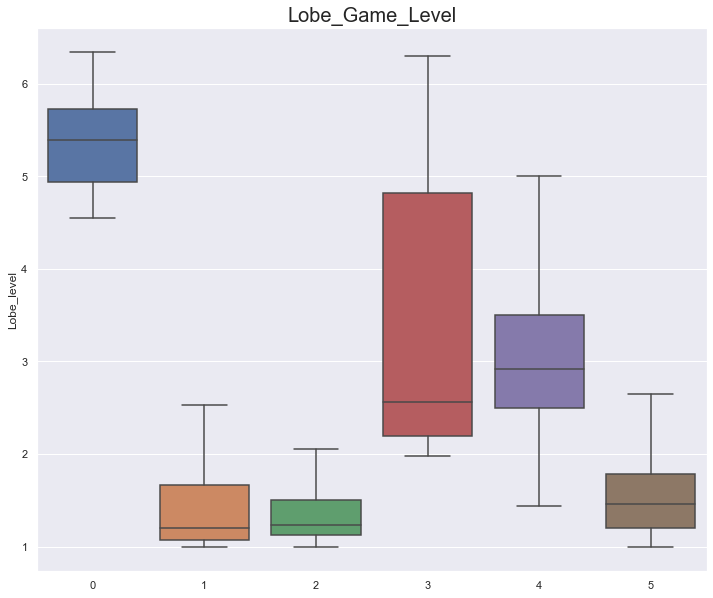

In [30]:
plt.figure(figsize=(12,10))
plt.title('Lobe_Game_Level', fontsize=20)
sns.boxplot(label, user_log_over65['Lobe_level'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


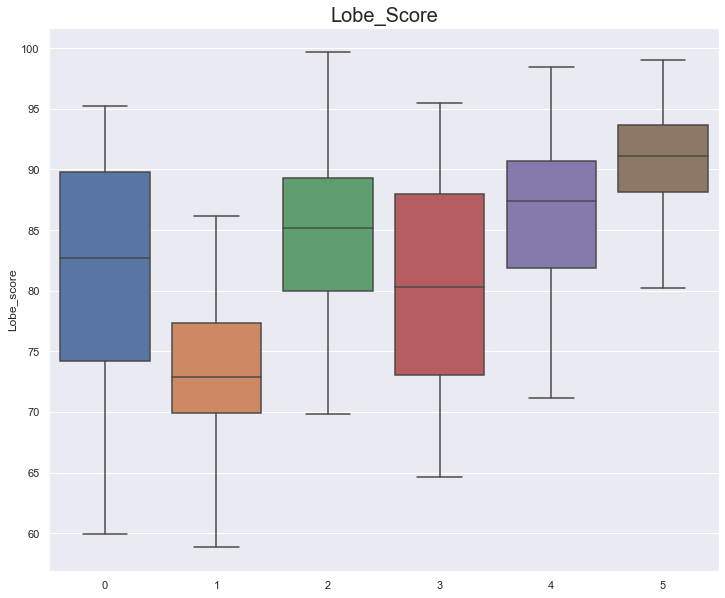

In [31]:
plt.figure(figsize=(12,10))
plt.title('Lobe_Score', fontsize=20)
sns.boxplot(label, user_log_over65['Lobe_score'], showfliers=False)
plt.show()

In [32]:
# user_log_over65.iloc[label==0]

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


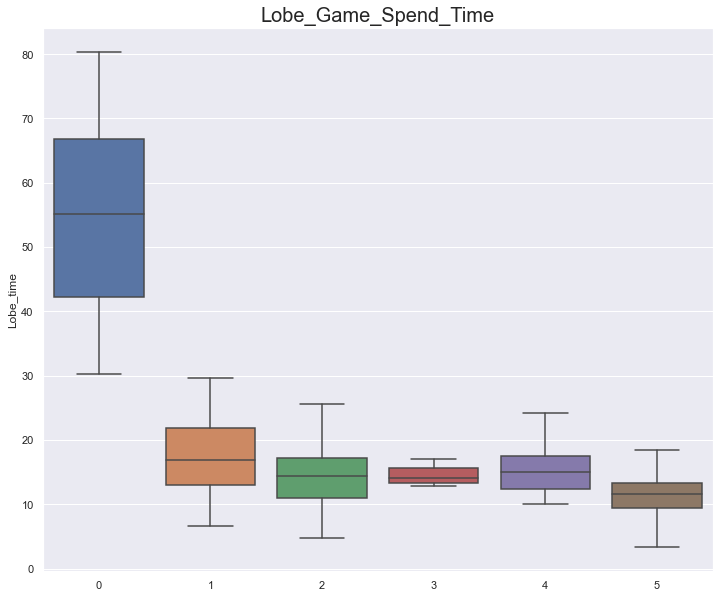

In [33]:
plt.figure(figsize=(12,10))
plt.title('Lobe_Game_Spend_Time', fontsize=20)
sns.boxplot(label, user_log_over65['Lobe_time'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


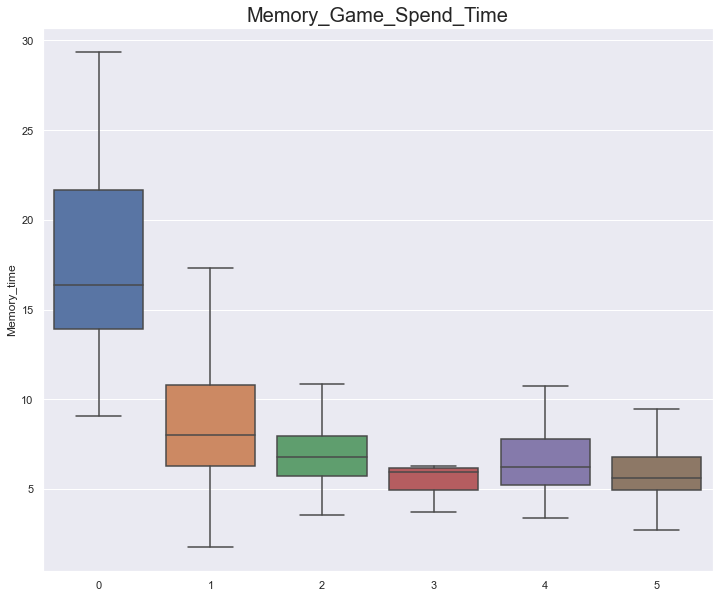

In [34]:
plt.figure(figsize=(12,10))
plt.title('Memory_Game_Spend_Time', fontsize=20)
sns.boxplot(label, user_log_over65['Memory_time'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


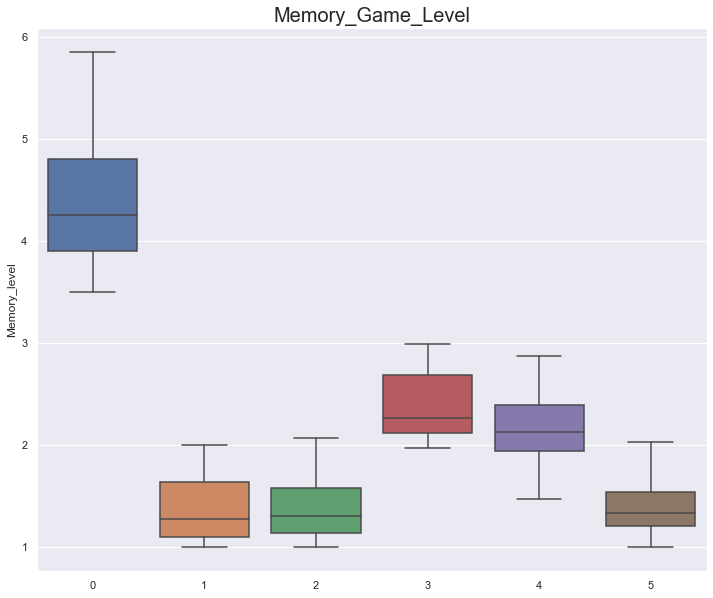

In [35]:
plt.figure(figsize=(12,10))
plt.title('Memory_Game_Level', fontsize=20)
sns.boxplot(label, user_log_over65['Memory_level'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


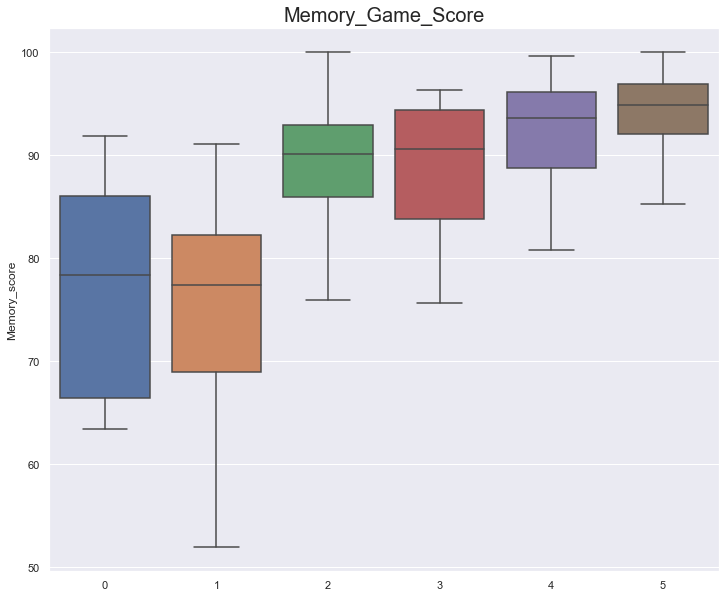

In [36]:
plt.figure(figsize=(12,10))
plt.title('Memory_Game_Score', fontsize=20)
sns.boxplot(label, user_log_over65['Memory_score'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


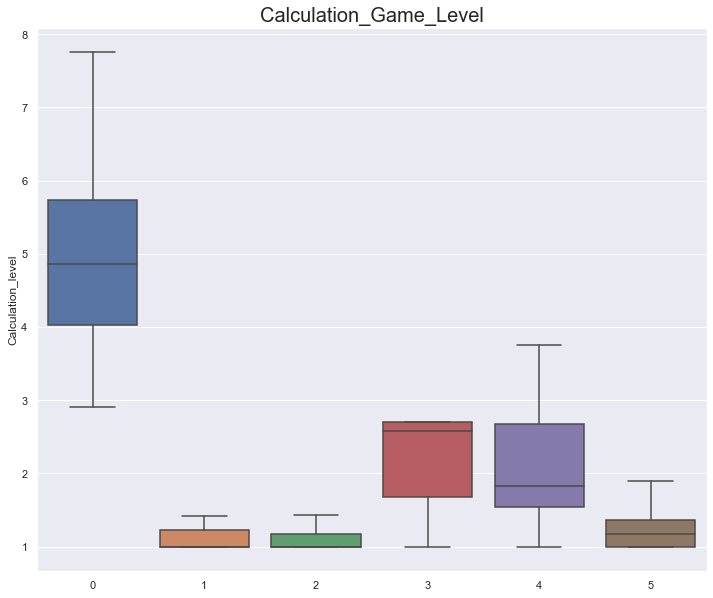

In [37]:
plt.figure(figsize=(12,10))
plt.title('Calculation_Game_Level', fontsize=20)
sns.boxplot(label, user_log_over65['Calculation_level'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


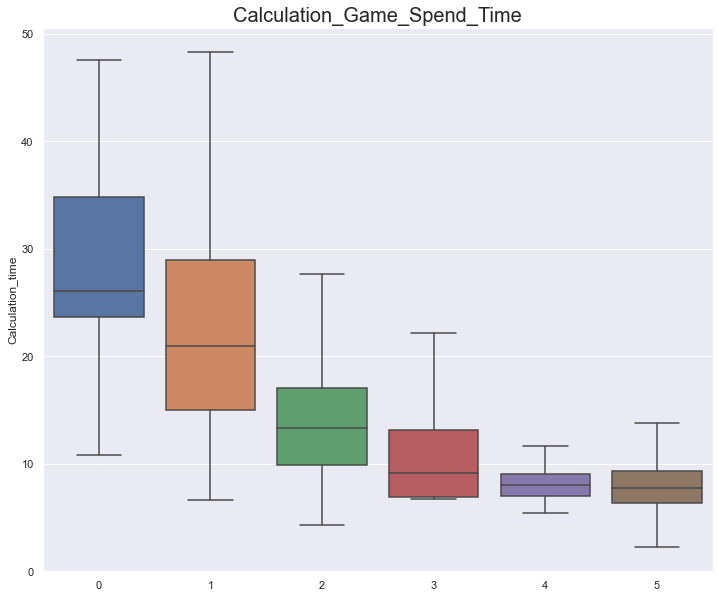

In [38]:
plt.figure(figsize=(12,10))
plt.title('Calculation_Game_Spend_Time', fontsize=20)
sns.boxplot(label, user_log_over65['Calculation_time'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


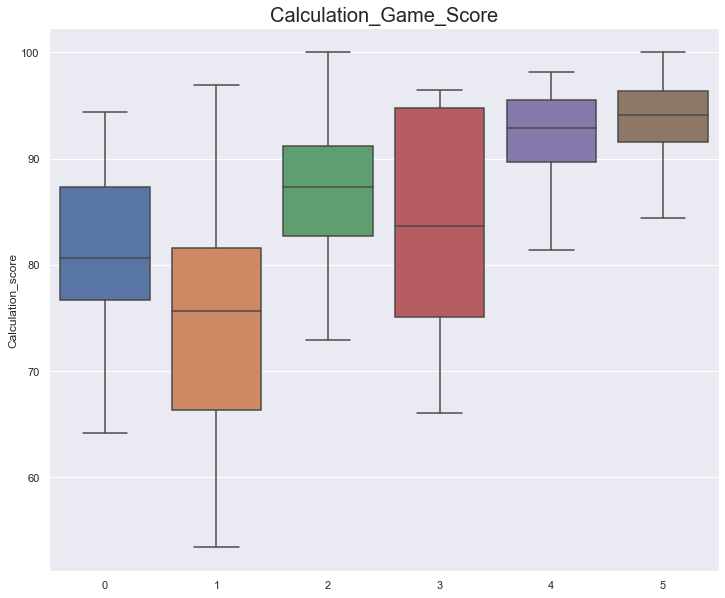

In [39]:
plt.figure(figsize=(12,10))
plt.title('Calculation_Game_Score', fontsize=20)
sns.boxplot(label, user_log_over65['Calculation_score'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


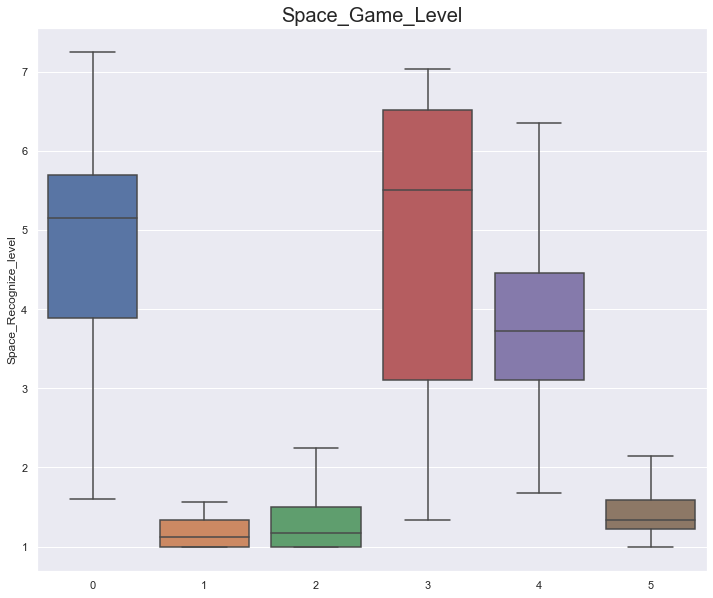

In [40]:
plt.figure(figsize=(12,10))
plt.title('Space_Game_Level', fontsize=20)
sns.boxplot(label, user_log_over65['Space_Recognize_level'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


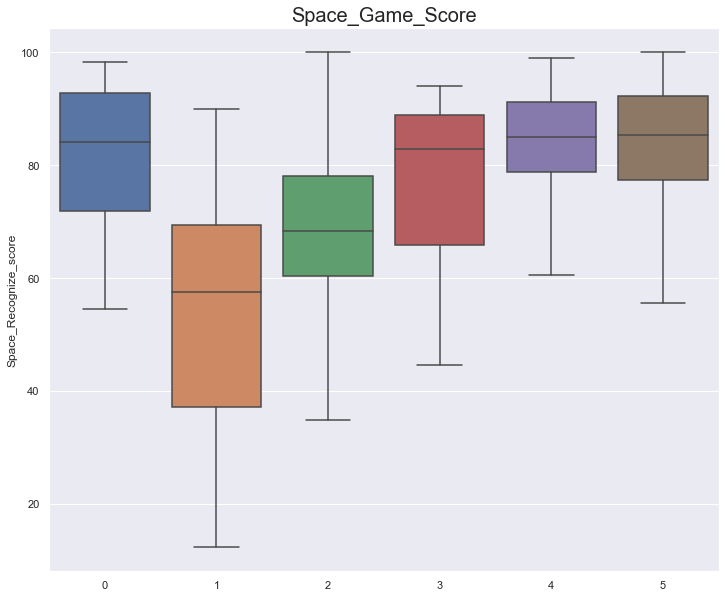

In [41]:
plt.figure(figsize=(12,10))
plt.title('Space_Game_Score', fontsize=20)
sns.boxplot(label, user_log_over65['Space_Recognize_score'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


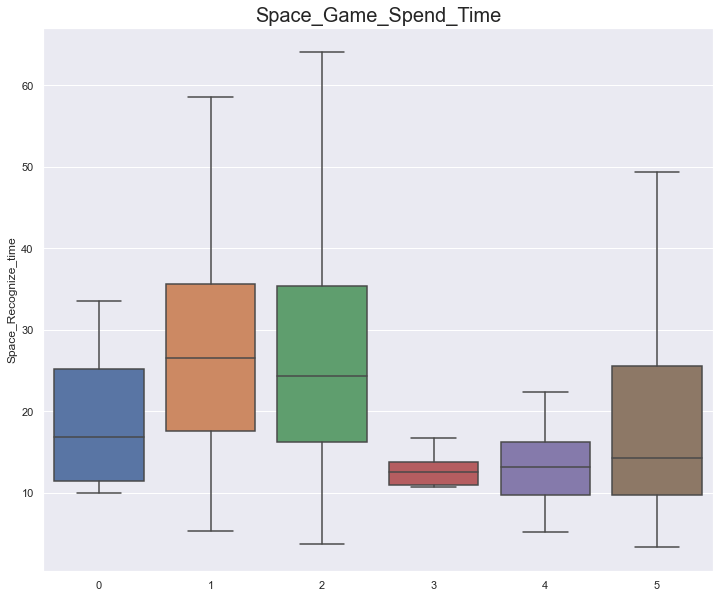

In [42]:
plt.figure(figsize=(12,10))
plt.title('Space_Game_Spend_Time', fontsize=20)
sns.boxplot(label, user_log_over65['Space_Recognize_time'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


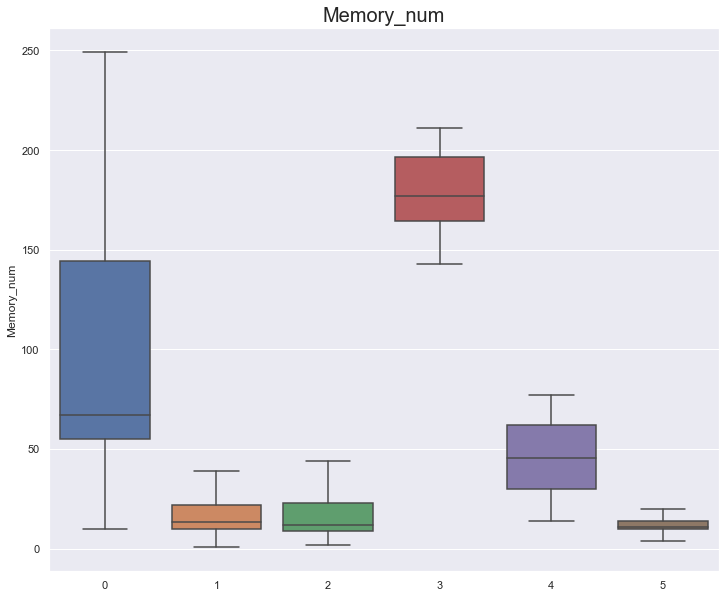

In [43]:
plt.figure(figsize=(12,10))
plt.title('Memory_num', fontsize=20)
sns.boxplot(label, user_log_over65['Memory_num'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


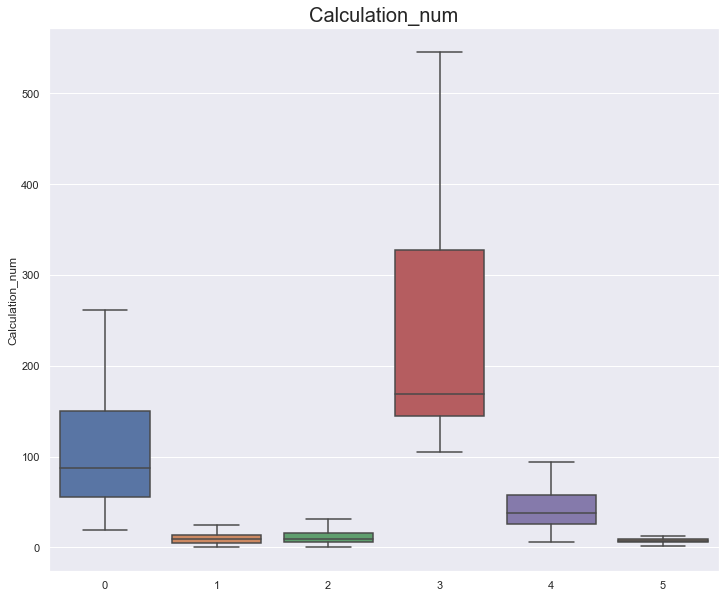

In [44]:
plt.figure(figsize=(12,10))
plt.title('Calculation_num', fontsize=20)
sns.boxplot(label, user_log_over65['Calculation_num'], showfliers=False)
plt.show()

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


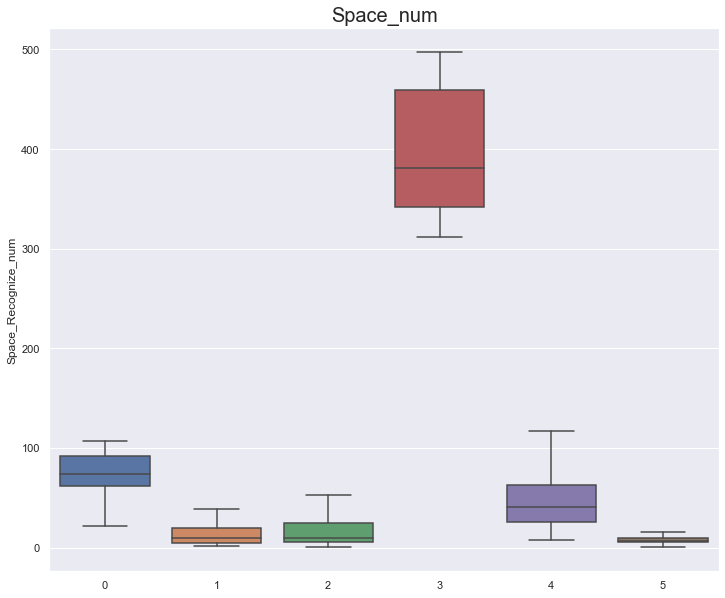

In [46]:
plt.figure(figsize=(12,10))
plt.title('Space_num', fontsize=20)
sns.boxplot(label, user_log_over65['Space_Recognize_num'], showfliers=False)
plt.show()